<a href="https://colab.research.google.com/github/Yilder02/SyS_2025-1/blob/main/Ejercicios_SyS/3_Serieytrf_fourier/2_TrfSAudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIOS
- **1). Presente y describa el modelo que utiliza la FFT para el cálculo de los armónicos:**





###  - Modelo para el cálculo de armónicos usando FFT

El modelo que utiliza la **Transformada Rápida de Fourier (FFT)** para el cálculo de los armónicos se basa en la **Transformada Discreta de Fourier (DFT)**, la cual descompone una señal discreta en una suma de exponenciales complejas equivalentes a ondas senoidales.

#### Pasos del modelo:

1. **Adquisición de la señal**: Capturar la señal de interés (por ejemplo, tensión o corriente) y digitalizarla con una frecuencia de muestreo adecuada.

2. **Muestreo y almacenamiento**: Registrar un número finito de muestras $x[n]$, con un número total $N$ de puntos.

3. **Aplicación de la FFT**: Utilizar el algoritmo FFT para calcular la DFT de la señal:

$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j \frac{2\pi}{N}kn}
$

4. **Cálculo de magnitud y fase**:


$|X[k]| = \sqrt{(\text{Re}(X[k]))^2 + (\text{Im}(X[k]))^2}$


$arg X[k] = \tan^{-1}\left( \frac{\text{Im}(X[k])}{\text{Re}(X[k])} \right)$


5. **Identificación de armónicos**: Cada índice \( k \) corresponde a una frecuencia:


$f_k = \frac{k \cdot f_s}{N}$

donde $f_s$ es la frecuencia de muestreo. Cada componente representa un armónico de la señal original.

6. **Interpretación de resultados**: Analizar la magnitud y fase de los armónicos obtenidos para evaluar la distorsión, identificar el armónico fundamental y los armónicos superiores, así como la componente de corriente continua (DC).

---

Este modelo permite realizar un análisis armónico eficiente y detallado, y se utiliza ampliamente en sistemas eléctricos para diagnosticar distorsiones, calcular el contenido armónico y evaluar la calidad de energía.

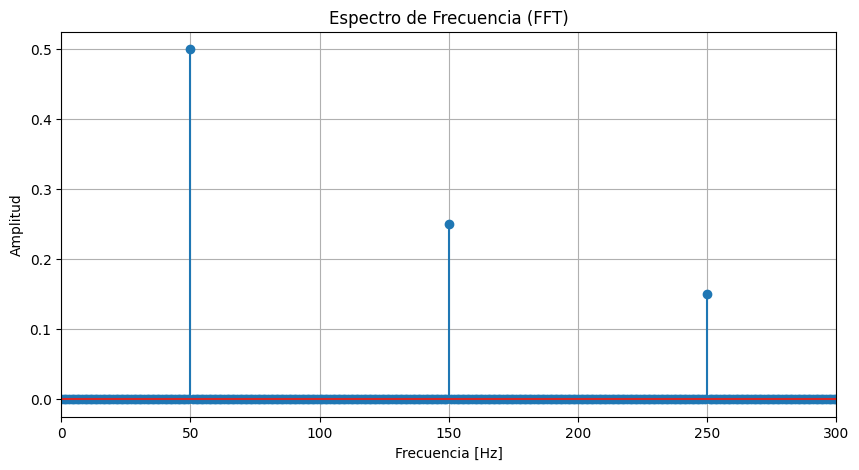

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo en Hz
T = 1      # Duración en segundos
t = np.linspace(0, T, fs*T, endpoint=False)  # Vector de tiempo

# Crear señal con armónicos: 50 Hz (fundamental), 150 Hz (3er), 250 Hz (5to)
f1, f3, f5 = 50, 150, 250
A1, A3, A5 = 1.0, 0.5, 0.3
signal = A1 * np.sin(2*np.pi*f1*t) + A3 * np.sin(2*np.pi*f3*t) + A5 * np.sin(2*np.pi*f5*t)

# Aplicar FFT
N = len(signal)
fft_result = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(N, 1/fs)

# Magnitud de la FFT
magnitude = np.abs(fft_result) / N  # Normalizada

# Mostrar solo la mitad positiva del espectro
half = N // 2
fft_freqs = fft_freqs[:half]
magnitude = magnitude[:half]

# Graficar espectro
plt.figure(figsize=(10, 5))
plt.stem(fft_freqs, magnitude)
plt.title('Espectro de Frecuencia (FFT)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.xlim(0, 300)  # Mostrar hasta 300 Hz
plt.show()


- **2). Realice una comparación del tiempo de cómputo requerido para el cálculo de la transformada discreta de Fourier utilizado la estimación por sumatoria vs la FFT. Pruebe distintos valores de longitud de la señal de entrada (4,8,16,32,64,128,256,512,1024,2048,4096). Presente una gráfica comparativa de los tiempos de ejecución en segundos vs la longitud de la señal de entrada.**

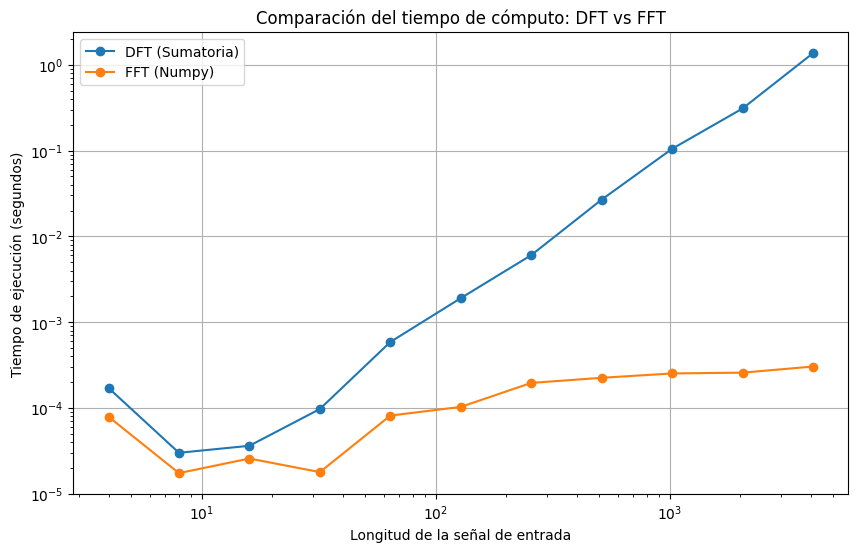

In [31]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Función para calcular la DFT usando la definición directa (sumatoria)
def dft_sum(signal):
    N = len(signal)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, signal)

# Función para calcular la FFT usando la función de numpy
def fft(signal):
    return np.fft.fft(signal)

# Valores de longitud de la señal de entrada a probar
lengths = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

# Arrays para almacenar los tiempos de cómputo
dft_times = []
fft_times = []

# Cálculo de los tiempos de cómputo para cada longitud de señal
for length in lengths:
    signal = np.random.random(length)

    # Tiempo para la DFT
    start_time = time.time()
    dft_sum(signal)
    dft_times.append(time.time() - start_time)

    # Tiempo para la FFT
    start_time = time.time()
    fft(signal)
    fft_times.append(time.time() - start_time)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(lengths, dft_times, label='DFT (Sumatoria)', marker='o')
plt.plot(lengths, fft_times, label='FFT (Numpy)', marker='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Longitud de la señal de entrada')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Comparación del tiempo de cómputo: DFT vs FFT')
plt.legend()
plt.grid(True)
plt.show()


**3).Consulte en qué consiste la frecuencia de -3dB y su relación con las frecuencias de corte en el filtrado espectral de señales.**

### **Frecuencia de -3 dB y su relación con el filtrado espectral:**

La **frecuencia de -3 dB** es el punto donde la **amplitud** de una señal o la respuesta de un filtro cae al **70.7% del valor máximo**, lo que equivale a una **disminución de 3 decibelios (dB)** en potencia.

$$20 \cdot \log_{10}\left(\frac{A}{A_{\text{máx}}}\right) = -3 \, \text{dB} \Rightarrow \frac{A}{A_{\text{máx}}} \approx 0.707$$


####  Relación con las frecuencias de corte:

En filtrado espectral, las **frecuencias de corte** son precisamente aquellas donde la respuesta del filtro cae a -3 dB. Estas frecuencias marcan los límites entre:

- **Banda pasante** (frecuencias que pasan casi sin atenuación)
- **Banda atenuada** (frecuencias que se reducen significativamente)

### Ejemplos:

- **Filtro pasa bajas**: frecuencia de corte = límite superior de paso
- **Filtro pasa altas**: frecuencia de corte = límite inferior de paso
- **Filtro pasa banda**: dos frecuencias de corte (inferior y superior)

#### En resumen:

> La frecuencia de -3 dB se usa para definir los **límites del paso efectivo de señales** en un filtro, y permite caracterizar su ancho de banda y comportamiento espectral.


**4).Implemente un filtro pasa bajas, un pasa altas, un pasa bandas, y un rechaza bandas utilizando la FFT y la iFFT sobre 5 segundos de su canción favorita de YouTube.**

In [44]:
# Paso 1: Instalar librerías necesarias
!pip install yt-dlp librosa scipy matplotlib numpy soundfile

# Paso 2: Descargar el audio del video con yt_dlp
import yt_dlp

video_url = 'https://youtu.be/ZFhdr31Tu7w?si=8Qk8KYdQ9KN2fIwo'  # Link largo oficial

# Configuración de descarga (solo audio)
ydl_opts = {
    'format': 'bestaudio/best',
    'outtmpl': 'audio.%(ext)s',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'wav',
        'preferredquality': '192',
    }],
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([video_url])

[youtube] Extracting URL: https://youtu.be/ZFhdr31Tu7w?si=8Qk8KYdQ9KN2fIwo
[youtube] ZFhdr31Tu7w: Downloading webpage
[youtube] ZFhdr31Tu7w: Downloading tv client config
[youtube] ZFhdr31Tu7w: Downloading tv player API JSON
[youtube] ZFhdr31Tu7w: Downloading ios player API JSON
[youtube] ZFhdr31Tu7w: Downloading m3u8 information
[info] ZFhdr31Tu7w: Downloading 1 format(s): 251
[download] Destination: audio.webm
[download] 100% of    3.33MiB in 00:00:00 at 11.18MiB/s  
[ExtractAudio] Destination: audio.wav
Deleting original file audio.webm (pass -k to keep)


- Luego de tener la cancion se procede a aplicar los filtros (pasa bajas, pasa altas, pasa bandas y rechaza bandas):


In [45]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Cargar señal de audio
y, sr = librosa.load("audio.wav", duration=15)
print(f"Señal cargada: {len(y)/sr:.2f} segundos")

# Función de filtro usando FFT
def aplicar_filtro_fft(y, sr, tipo='pasa_bajas', fmin=300, fmax=1000):
    Y = np.fft.fft(y)
    freqs = np.fft.fftfreq(len(y), 1/sr)
    mask = np.ones_like(Y, dtype=bool)

    if tipo == 'pasa_bajas':
        mask[np.abs(freqs) > fmax] = False
    elif tipo == 'pasa_altas':
        mask[np.abs(freqs) < fmin] = False
    elif tipo == 'pasa_bandas':
        mask[(np.abs(freqs) < fmin) | (np.abs(freqs) > fmax)] = False
    elif tipo == 'rechaza_bandas':
        mask[(np.abs(freqs) > fmin) & (np.abs(freqs) < fmax)] = False

    Y_filtrado = Y * mask
    y_filtrado = np.fft.ifft(Y_filtrado).real
    return y_filtrado


Señal cargada: 15.00 segundos


### **REPRODUCCION DEL SEGMENTO FILTRADO:**

In [47]:
# Aplicar los filtros
y_pb = aplicar_filtro_fft(y, sr, 'pasa_bajas', fmax=1000)
y_pa = aplicar_filtro_fft(y, sr, 'pasa_altas', fmin=2000)
y_pbanda = aplicar_filtro_fft(y, sr, 'pasa_bandas', fmin=1000, fmax=3000)
y_rbanda = aplicar_filtro_fft(y, sr, 'rechaza_bandas', fmin=1000, fmax=3000)
from IPython.display import Audio

print("Audio Original:")
display(Audio(y, rate=sr))

print("Pasa bajas:")
display(Audio(y_pb, rate=sr))

print("Pasa altas:")
display(Audio(y_pa, rate=sr))

print("Pasa bandas:")
display(Audio(y_pbanda, rate=sr))

print("Rechaza bandas:")
display(Audio(y_rbanda, rate=sr))

Audio Original:


Pasa bajas:


Pasa altas:


Pasa bandas:


Rechaza bandas:
